In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [205]:
def get_paragraph(gray_img, bin_img):

    height, width = gray_img.shape

    contours, hierarchy = cv.findContours(bin_img, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

    threshold_width = 1500


    up, down, left, right = 0, height - 1, 0, width - 1

    for cnt in contours:
        x, y, w, h = cv.boundingRect(cnt)

        if w < threshold_width:
            continue

        if y < height / 2:
            if y > up:
                up = y
        else:
            down = y

    th = 0
    bin_img = bin_img[up:down + 1, left:right + 1]
    gray_img = gray_img[up:down + 1, left:right + 1]
    # Apply erosion to remove noise and dots.
    kernel = np.ones((3, 3), np.uint8)
    bin_img = cv.erode(bin_img, kernel, iterations=3)
    pts = np.nonzero(bin_img)
    x_min, y_min, x_max, y_max = min(pts[0]), min(pts[1]), max(pts[0]), max(pts[1])
    bin_img = bin_img[x_min-th:x_max+th, y_min-th:y_max+th]
    gray_img = gray_img[x_min-th:x_max+th, y_min-th:y_max+th]
    # Return the handwritten paragraph
    return gray_img, bin_img

def preprocessing(gray_img):
    gray_img = cv.GaussianBlur(gray_img, (5, 5), 0)
    ## (2) threshold
    thresh, bin_img = cv.threshold(gray_img, 0, 255, cv.THRESH_BINARY_INV|cv.THRESH_OTSU)
    gray_img, bin_img = get_paragraph(gray_img, bin_img)
    thresh, bin_img = cv.threshold(gray_img, 0, 255, cv.THRESH_BINARY_INV|cv.THRESH_OTSU)
    plt.imshow(bin_img)
    hist = cv.reduce(bin_img,1, cv.REDUCE_AVG).reshape(-1)
#     for h in hist:
#         print(h)
    th = 0
    H,W = bin_img.shape[:2]
    uppers = []
    lowers = []
    if hist[0] != 0:
        uppers.append(0)
    
     
    for y in range(H-1):
        if hist[y]==th and hist[y+1]>th:
            uppers.append(y)
     
    for y in range(H-1):
        if hist[y]>th and hist[y+1]==th:
            lowers.append(y)
            
    if hist[len(hist)-1] != 0:
        lowers.append(len(hist)-1)
    print(uppers)
    print(lowers)
    img = cv.cvtColor(gray_img, cv.COLOR_GRAY2BGR)
    
    lines = []
    for i in range(len(uppers)):
        lines.append(img[uppers[i]:lowers[i], :])
    
    count = 1
    for l in lines:
        cv.imwrite("line" + str(count) + ".png", l)
        count+=1

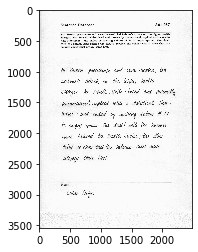

In [212]:
img = cv.imread('writers/017/a01-087.png')
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img)

[0, 169, 325, 522, 700, 879, 1053, 1228, 1412]
[93, 288, 468, 628, 843, 995, 1160, 1327, 1539]


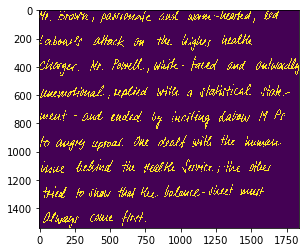

In [213]:
preprocessing(gray_img)
# img = cv.cvtColor(gray_img, cv.COLOR_GRAY2BGR)
# plt.imshow(img)